<a href="https://colab.research.google.com/github/geeky-programer/Covid/blob/master/SIR_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python --version

Python 3.7.13


In [3]:
!pip install --upgrade "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lisphilar/covid19-sir.git to /tmp/pip-install-v7zzecjo/covsirphy_87e526b543c547e0968f5d3903a4703d
  Running command git clone -q https://github.com/lisphilar/covid19-sir.git /tmp/pip-install-v7zzecjo/covsirphy_87e526b543c547e0968f5d3903a4703d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.0 MB 2.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50 kB 2.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308 kB 49.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 62 kB 1.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñ

In [4]:
import covsirphy as cs
cs.__version__

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.24.0-mu-1'

In [5]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from collections import defaultdict
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import functools
from IPython.display import display, Markdown
import math
import os
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import numpy as np
import pandas as pd
#import dask.dataframe as dd
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import scipy as sci
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sympy as sym

In [7]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#import dask.dataframe as dd

In [9]:
# Ramdam
np.random.seed(123)
os.environ["PYTHONHASHSEED"] = "123"
# Matplotlib
plt.style.use("seaborn-ticks")
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.size"] = 11.0
plt.rcParams["figure.figsize"] = (9, 6)
# Pandas
pd.set_option("display.max_colwidth", 1000)

In [10]:
data_loader = cs.DataLoader(directory="kaggle/input")
jhu_data = data_loader.jhu()

Retrieving COVID-19 dataset from https://github.com/lisphilar/covid19-sir/data/
Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
	Please set verbose=2 to see the detailed citation list.
Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/
Retrieving datasets from COVID-19 Open Data by Google Cloud Platform https://github.com/GoogleCloudPlatform/covid-19-open-data


In [11]:
jhu_data.cleaned().tail()

Date ISO3   Country Province  Confirmed  Infected  Fatal  \
948177 2022-06-21  ZWE  Zimbabwe        -     254919    166389   5536   
948178 2022-06-22  ZWE  Zimbabwe        -     255049    166514   5541   
948179 2022-06-23  ZWE  Zimbabwe        -     255136    166600   5542   
948180 2022-06-24  ZWE  Zimbabwe        -     255309    166766   5549   
948181 2022-06-25  ZWE  Zimbabwe        -     255309    166766   5549   

        Recovered  Population  
948177      82994    14439018  
948178      82994    14439018  
948179      82994    14439018  
948180      82994    14439018  
948181      82994    14439018

In [12]:
jhu_data.subset("Japan", province=None).tail()

Date  Confirmed  Infected  Fatal  Recovered  Susceptible
864 2022-06-22    9193361    158352  31077    9003932    117335739
865 2022-06-23    9210035    158570  31092    9020373    117319065
866 2022-06-24    9226006    161297  31107    9033602    117303094
867 2022-06-25    9242596    161838  31116    9049642    117286504
868 2022-06-26    9256834    162532  31128    9063174    117272266

In [13]:
df = jhu_data.cleaned()
jhu_first_date, jhu_last_date = df["Date"].min(), df["Date"].max()
jhu_elapsed = (jhu_last_date - jhu_first_date).days
print(f"{jhu_elapsed} days have passed from the date of the first record.")

908 days have passed from the date of the first record.


In [14]:
pyramid_data = data_loader.pyramid()

In [15]:
# marcoferrante estimation
_period_of_life_list = [
    "nursery", "nursery school", "elementary school", "middle school",
    "high school", "university/work", "work", "work", "work", "work",
    "retired", "retired", "retired"
]
df = pd.DataFrame(
    {
        "Age_first": [0, 3, 6, 11, 14, 19, 26, 36, 46, 56, 66, 76, 86],
        "Age_last": [2, 5, 10, 13, 18, 25, 35, 45, 55, 65, 75, 85, 95],
        "Period_of_life": _period_of_life_list,
        "Days": [3, 5, 6, 6, 7, 7, 6, 5, 5, 5, 4, 3, 2]
    }
)
# Adjustment by author
df["Types"] = df["Period_of_life"].replace(
    {
        "nursery": "school",
        "nursery school": "school",
        "elementary school": "school",
        "middle school": "school",
        "high school": "school",
        "university/work": "school/work"
    }
)
df["School"] = df[["Types", "Days"]].apply(lambda x: x[1] if "school" in x[0] else 0, axis=1)
df["Office"] = df[["Types", "Days"]].apply(lambda x: x[1] if "work" in x[0] else 0, axis=1)
df["Others"] = df["Days"] - df[["School", "Office"]].sum(axis=1)
df.loc[df["Others"] < 0, "Others"] = 0
df.loc[df.index[1:5], "School"] -= 1
df.loc[df.index[1:5], "Others"] += 1
df.loc[df.index[5], ["School", "Office", "Others"]] = [3, 3, 1]
df[["School", "Office", "Others"]] = df[["Days", "School", "Office", "Others"]].apply(
    lambda x: x[1:] / sum(x[1:]) * x[0], axis=1
).astype(np.int64)
df.loc[df.index[6:10], "Others"] += 1
df = df.drop(["Days", "Types"], axis=1)
# Show dataset
_out_df = df.copy()
_out_df

Age_first  Age_last     Period_of_life  School  Office  Others
0           0         2            nursery       3       0       0
1           3         5     nursery school       4       0       1
2           6        10  elementary school       5       0       1
3          11        13      middle school       5       0       1
4          14        18        high school       6       0       1
5          19        25    university/work       3       3       1
6          26        35               work       0       6       1
7          36        45               work       0       5       1
8          46        55               work       0       5       1
9          56        65               work       0       5       1
10         66        75            retired       0       0       4
11         76        85            retired       0       0       3
12         86        95            retired       0       0       2

In [16]:
def go_out(country, pyramid_data=pyramid_data):
    """
    Return the estimated number of days people usually go out.
    Args:
        country (str): coutry name
        pyramid_data (covsirphy.PopulationPyramidData): pyramid dataset
    
    Returns:
        pandas.DataFrame
    """
    p_df = pyramid_data.subset(country)
    p_df["Cumsum"] = p_df["Population"].cumsum()
    df = pd.merge(_out_df, p_df, left_on="Age_last", right_on="Age", how="left")
    df["Population"] = df["Cumsum"].diff()
    df.loc[df.index[0], "Population"] = df.loc[df.index[0], "Cumsum"]
    df["Population"] = df["Population"].astype(np.int64)
    df["Portion"] = df["Population"] / df["Population"].sum()
    return df.drop(["Per_total", "Cumsum"], axis=1)

go_out("Germany")

Retrieving population pyramid dataset (Germany) from https://data.worldbank.org/


Age_first  Age_last     Period_of_life  School  Office  Others  Age  \
0           0         2            nursery       3       0       0    2   
1           3         5     nursery school       4       0       1    5   
2           6        10  elementary school       5       0       1   10   
3          11        13      middle school       5       0       1   13   
4          14        18        high school       6       0       1   18   
5          19        25    university/work       3       3       1   25   
6          26        35               work       0       6       1   35   
7          36        45               work       0       5       1   45   
8          46        55               work       0       5       1   55   
9          56        65               work       0       5       1   65   
10         66        75            retired       0       0       4   75   
11         76        85            retired       0       0       3   85   
12         86        95            retired       0       0       2   95   

    Population   Portion  
0      2417094  0.031933  
1      2370155  0.031313  
2      3791695  0.050093  
3      2269977  0.029989  
4      4027327  0.053206  
5      6294846  0.083162  
6     10309780  0.136204  
7     10362882  0.136906  
8     12098943  0.159841  
9     12140164  0.160386  
10     4552159  0.060139  
11     3702196  0.048910  
12     1356280  0.017918

In [17]:
"""ita_action_raw = pd.read_excel(
    "/kaggle/input/covid19-prevention-in-italy/Dataset_Italy_COVID_19.xlsx",
    sheet_name="Foglio1"
)
ita_action_raw.head()
"""

'ita_action_raw = pd.read_excel(\n    "/kaggle/input/covid19-prevention-in-italy/Dataset_Italy_COVID_19.xlsx",\n    sheet_name="Foglio1"\n)\nita_action_raw.head()\n'

In [18]:
"""df = ita_action_raw.copy()
df = df.drop(["Country", "Village", "link"], axis=1)
df.columns = [col.capitalize().replace(" ", "_") for col in df.columns]
df["Start_date"] = pd.to_datetime(df["Start_date"])
df["End_date"] = pd.to_datetime(df["End_date"])
df["Region"] = df["Region"].fillna("-")
df["Number_of_people"] = df["Number_of_people"].fillna(-1)
ita_action_df = df.copy()
ita_action_df.tail()
"""

'df = ita_action_raw.copy()\ndf = df.drop(["Country", "Village", "link"], axis=1)\ndf.columns = [col.capitalize().replace(" ", "_") for col in df.columns]\ndf["Start_date"] = pd.to_datetime(df["Start_date"])\ndf["End_date"] = pd.to_datetime(df["End_date"])\ndf["Region"] = df["Region"].fillna("-")\ndf["Number_of_people"] = df["Number_of_people"].fillna(-1)\nita_action_df = df.copy()\nita_action_df.tail()\n'

In [19]:
data_cols = ["Infected", "Fatal", "Recovered"]
rate_cols = ["Fatal per Confirmed", "Recovered per Confirmed", "Fatal per (Fatal or Recovered)"]

In [20]:
total_df = jhu_data.total()
total_df = total_df.loc[total_df.index <= jhu_last_date, :]
total_df.tail()

Confirmed   Infected    Fatal  Recovered  Fatal per Confirmed  \
Date                                                                        
2022-06-23  494907733  303951571  5685236  185270926             0.011487   
2022-06-24  491449131  300510719  5655114  185283298             0.011507   
2022-06-25  482685094  291707888  5630076  185347130             0.011664   
2022-06-26  118458675   23432466  1198525   93827684             0.010118   
2022-06-27    3612535    3593458     6120      12957             0.001694   

            Recovered per Confirmed  Fatal per (Fatal or Recovered)  
Date                                                                 
2022-06-23                 0.374354                        0.029772  
2022-06-24                 0.377014                        0.029617  
2022-06-25                 0.383992                        0.029480  
2022-06-26                 0.792071                        0.012613  
2022-06-27                 0.003587                        0.320805

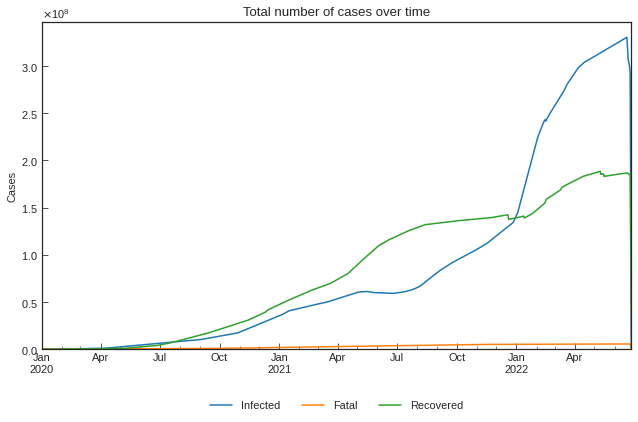

In [21]:
cs.line_plot(total_df[data_cols], "Total number of cases over time")

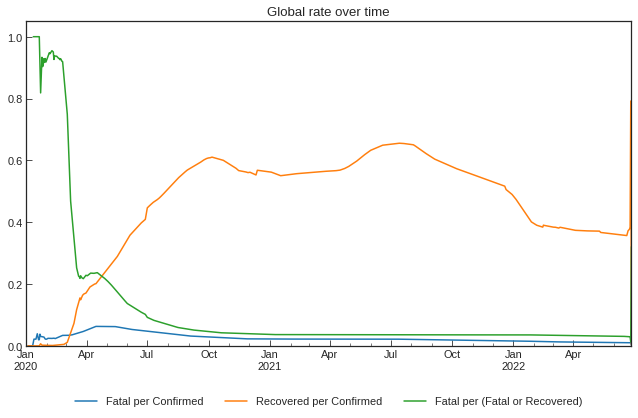

In [22]:
cs.line_plot(total_df[rate_cols], "Global rate over time", ylabel="", math_scale=False)

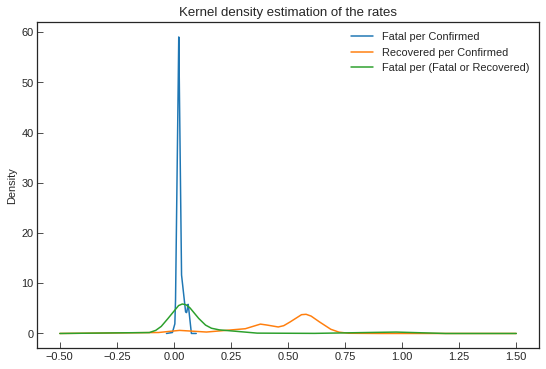

In [23]:
total_df[rate_cols].plot.kde()
plt.title("Kernel density estimation of the rates")
plt.show()

In [24]:
total_df[rate_cols].describe().T

count      mean       std  min       25%  \
Fatal per Confirmed             907.0  0.025649  0.013314  0.0  0.020057   
Recovered per Confirmed         907.0  0.457443  0.179693  0.0  0.372103   
Fatal per (Fatal or Recovered)  899.0  0.112740  0.213958  0.0  0.033026   

                                     50%       75%       max  
Fatal per Confirmed             0.021584  0.029169  0.065202  
Recovered per Confirmed         0.545133  0.576905  1.000000  
Fatal per (Fatal or Recovered)  0.036672  0.056778  1.000000

In [25]:
#calculating growth factor

covid_df = jhu_data.cleaned()
df = covid_df.pivot_table(
    index="Date", columns="Country", values="Confirmed", aggfunc="sum"
).fillna(method="ffill").fillna(0)
# Growth factor: (delta Number_n) / (delta Number_n)
df = df.diff() / df.diff().shift(freq="D")
df = df.replace(np.inf, np.nan).fillna(1.0)
# Rolling mean (window: 7 days)
df = df.rolling(7).mean().dropna().loc[:covid_df["Date"].max(), :]
# round: 0.01
growth_value_df = df.round(2)
growth_value_df.tail()

Country       -  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
Date                                                                      
2022-06-09  1.0         0.79     1.35     1.02            0.86     0.71   
2022-06-10  1.0         0.70     1.33     1.09            0.86     0.71   
2022-06-18  1.0         1.15     0.54     1.50            1.00     0.86   
2022-06-19  1.0         1.34     0.57     1.55            1.00     0.86   
2022-06-20  1.0         1.29     0.59     1.19            1.00     0.86   

Country     Angola  Anguilla  Antigua and Barbuda  Argentina  ...  Uzbekistan  \
Date                                                          ...               
2022-06-09     1.0      0.86                 0.71       0.86  ...        1.09   
2022-06-10     1.0      0.86                 1.09       0.86  ...        1.02   
2022-06-18     1.0      0.86                 1.09       0.86  ...        1.45   
2022-06-19     1.0      0.86                 0.94       0.86  ...        1.45   
2022-06-20     1.0      0.86                 0.66       0.71  ...        1.45   

Country     Vanuatu  Venezuela  Vietnam  Virgin Islands, British  \
Date                                                               
2022-06-09     0.49       0.80     0.90                     1.00   
2022-06-10     0.48       0.73     1.00                     0.86   
2022-06-18     0.89       1.00     1.02                     0.86   
2022-06-19    10.32       0.98     1.08                     0.86   
2022-06-20    10.22       1.06     1.06                     0.86   

Country     Virgin Islands, U.S.  Wallis and Futuna  Yemen  Zambia  Zimbabwe  
Date                                                                          
2022-06-09                  1.24                1.0   1.00    0.74      0.80  
2022-06-10                  1.20                1.0   1.00    0.76      0.79  
2022-06-18                  0.71                1.0   0.86    1.30      0.79  
2022-06-19                  0.71                1.0   0.86    1.30      0.79  
2022-06-20                  0.71                1.0   0.86    1.19      0.76  

[5 rows x 235 columns]

SIR non dimensional implementation

In [26]:
example_data = cs.ExampleData(tau=1440, start_date="01Jan2020")

example_data.cleaned()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Please use Dynamics.from_sample() rather than ExampleData(), version >= 2.24.0-kappa.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [Date, Country, Province, Confirmed, Infected, Fatal, Recovered]
Index: []

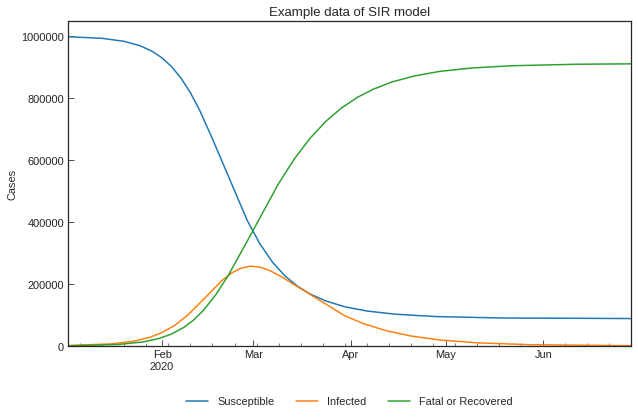

In [28]:
model = cs.SIR
area = {"country": "Germany", "province": model.NAME}
# Add records with SIR model
example_data.add(model, **area)
# Records with model variables
df = example_data.specialized(model, **area)
cs.line_plot(
    df.set_index("Date"),
    title=f"Example data of {model.NAME} model",
    y_integer=True
)

In [29]:
print(cs.SIR.NAME)
# Example parameter values
pprint(cs.SIR.EXAMPLE, compact=True)

SIR
{'param_dict': {'rho': 0.2, 'sigma': 0.075},
 'population': 1000000,
 'step_n': 180,
 'y0_dict': {'Fatal or Recovered': 0, 'Infected': 1000, 'Susceptible': 999000}}


In [30]:
df = example_data.specialized(model, **area)
df.head()

Date  Susceptible  Infected  Fatal or Recovered
0 2020-01-02       998787      1133                  80
1 2020-01-03       998547      1283                 170
2 2020-01-04       998273      1454                 273
3 2020-01-05       997964      1647                 389
4 2020-01-06       997614      1865                 521

In [31]:
# Calculate reproduction number
# Note: population value will be applied, but not used in calculation
param_dict = cs.SIR.EXAMPLE["param_dict"].copy()
model_instance = cs.SIR(population=100000, **param_dict)
r0 = model_instance.calc_r0()
print(f"Reproduction number of {model_instance.NAME} model: {r0}")

Reproduction number of SIR model: 2.67


In [32]:
eg_r0 = model(model.EXAMPLE["population"], **model.EXAMPLE["param_dict"]).calc_r0()
df = example_data.specialized(model, **area)
x_max = df.loc[df["Infected"].idxmax(), "Susceptible"] / cs.SIR.EXAMPLE["population"]
(x_max, 1/eg_r0)


(0.366211, 0.37453183520599254)

Hyperparameter optimization
In the previous paragraphs figures, we calculated the number of cases based on hypothesized parameter values. However, we do not know parameter values of the actual data. Here, we will estimate the ( ùúÉ,ùúÖ,ùúå,ùúé ) values of the example data using hyperparameter optimization method by Optuna package.  ùúè  will be fixed as 1440 [min].

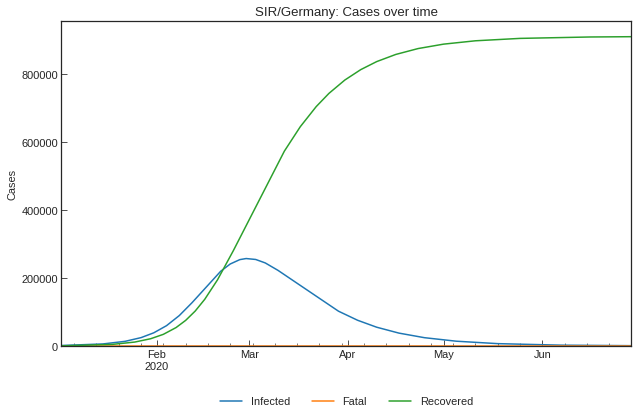

In [33]:
sirf_snl = cs.Scenario(example_data, tau=1440, **area)
_ = sirf_snl.records()

In [34]:
# Set phases (phase: explained in "S-R trend analysis section")
# Records at 01Jan2020 will be removed because Recovered = 0
sirf_snl.clear(include_past=True)
sirf_snl.add().summary()

Type      Start        End  Population
0th  Past  02Jan2020  29Jun2020     1000000

In [35]:
# Parameter estimation
sirf_snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 2 CPUs...


[I 2022-06-27 08:54:15,083] A new study created in memory with name: no-name-581dc54a-ee62-42f5-bfdf-72fefb4761fa
[I 2022-06-27 08:54:15,111] Trial 0 finished with value: 6.416699292360972 and parameters: {'theta': 0.2744067519636624, 'kappa': 0.0, 'rho': 0.20232757150755995, 'sigma': 0.07468937098184168}. Best is trial 0 with value: 6.416699292360972.
[I 2022-06-27 08:54:15,128] Trial 1 finished with value: 6.381781245773957 and parameters: {'theta': 0.27244159149844843, 'kappa': 0.0, 'rho': 0.19671026363805105, 'sigma': 0.07497651018126214}. Best is trial 1 with value: 6.381781245773957.
[I 2022-06-27 08:54:15,147] Trial 2 finished with value: 6.3499117013048245 and parameters: {'theta': 0.21879360563134626, 'kappa': 0.0, 'rho': 0.20572999698762945, 'sigma': 0.07709202782325794}. Best is trial 2 with value: 6.3499117013048245.
[I 2022-06-27 08:54:15,165] Trial 3 finished with value: 6.315282305618968 and parameters: {'theta': 0.19172075941288885, 'kappa': 0.0, 'rho': 0.20380226603648

	02Jan2020 - 29Jun2020: finished  575 trials in 0 min 16 sec
Completed optimization. Total: 0 min 16 sec


Note:
"Score" is Root Mean Squared Log Error (RMSLE) score.
1ùëõ‚àëùëñ=1ùëõ(ùëôùëúùëî10(ùê¥ùëñ+1)‚àíùëôùëúùëî10(ùëÉùëñ+1))2‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚Äæ‚ÄæÓÄÅ‚é∑ÓÄÄÓÄÄ
 
Where  ùê¥  is observed (actual) values,  ùëÉ  is estimated (predicted) values. Variables are  ùëÜ  ( ùëñ=1 ),  ùêº  ( ùëñ=2 ),  ùëÖ  ( ùëñ=3 ) and  ùêπ  ( ùëñ=ùëõ=4 ) for SIR-F model. When RMSLE score is low, hyperparameter estimation is highly accurate.
Please refer to What‚Äôs the Difference Between RMSE and RMSLE?


In [36]:
df = sirf_snl.summary()
setting_model = cs.SIRF(population=cs.SIRF.EXAMPLE["population"], **cs.SIRF.EXAMPLE["param_dict"])
setting_dict = {
    "Population": cs.SIRF.EXAMPLE["population"],
    "ODE": cs.SIRF.NAME,
    "Rt": setting_model.calc_r0(),
    "tau": 1440,
    **setting_model.calc_days_dict(1440),
    **cs.SIRF.EXAMPLE["param_dict"]
}
df = df.append(pd.Series(setting_dict, name="setting"))
df.fillna("-")

Type      Start        End  Population    ODE    Rt     theta  kappa  \
0th      Past  02Jan2020  29Jun2020     1000000  SIR-F  2.65  0.000001  0.000   
setting     -          -          -     1000000  SIR-F  2.50  0.002000  0.005   

              rho   sigma   tau     RMSLE Trials       Runtime 1/alpha2 [day]  \
0th      0.200844  0.0758  1440  0.344245  575.0  0 min 16 sec              -   
setting  0.200000  0.0750  1440         -      -             -          200.0   

        1/beta [day] 1/gamma [day] alpha1 [-]  
0th                -             -          -  
setting          5.0          13.0      0.002

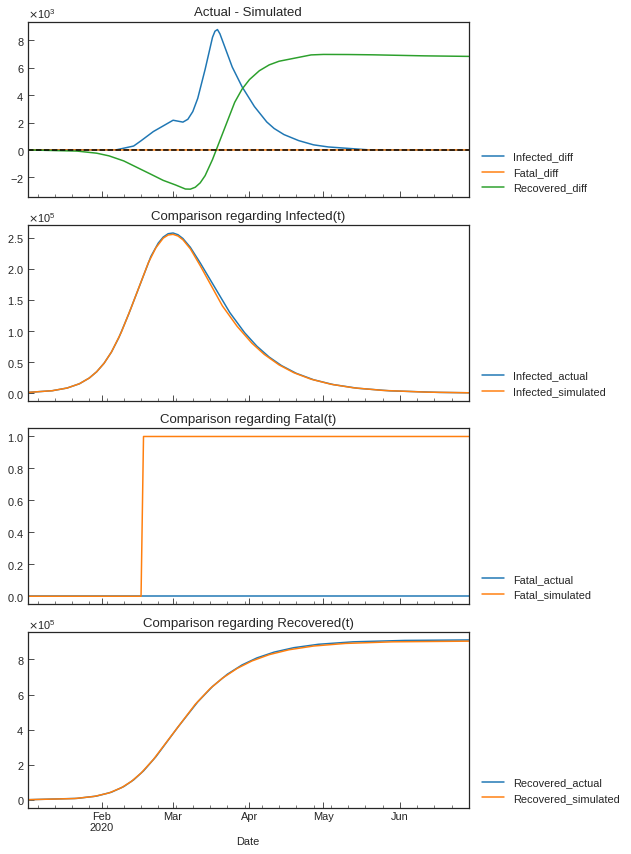

In [37]:
sirf_snl.estimate_accuracy("0th")